PRÁCTICA 1 VISIÓN POR COMPUTACIÓN 2024 (Pedro Batista Sosa) 

Paquetes Necesarios

In [2]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

Inicializaciones

In [3]:
# Dimesiones de la imagen en todas las tareas requeridas
ancho = 800
alto = 800

TAREA: Crea una imagen, p.e. de 800x800 píxeles, con la textura del tablero de ajedrez

(800, 800, 3)


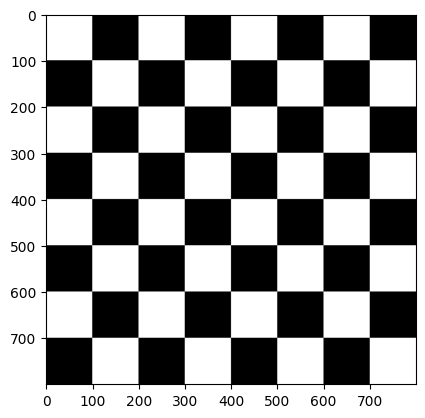

In [7]:
#Crea una imagen con tres planos
color_img = np.zeros((alto,ancho,3), dtype = np.uint8)

# Imprimir dimensiones de la imagen 
print(color_img.shape)

# Bucle para crear el tablero del ajedrez 
# Se divide la imagen en cuadriculas cambiando 
# el valor (para transformarlo a blanco) o no (dejarlo en negro) 
for fila in range(0, alto, 100):
    for columna in range(0, ancho, 100):
        if (fila / 100) % 2 == (columna / 100) % 2:
            color_img[fila:fila+100, columna:columna+100] = 255  # Cambiar el valor de a blanco

plt.imshow(color_img) 
plt.show()


En otro color

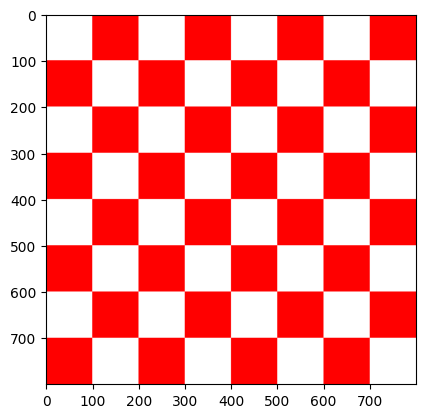

In [8]:
# Modificar los planos
color_img[:,:,0] = 255 
#color_img[:,:,1] = 200 
#color_img[:,:,2] = 255 
plt.imshow(color_img) 
plt.show()

TAREA: Crear una imagen estilo Mondrian (un ejemplo https://www3.gobiernodecanarias.org/medusa/ecoescuela/sa/2017/04/17/descubriendo-a-mondrian/ )

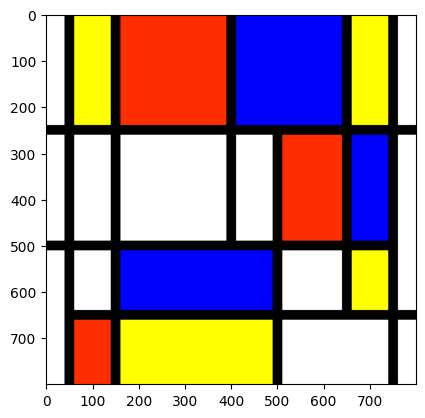

True

In [10]:
#Crea una imagen con tres planos
color_img = np.zeros((alto,ancho,3), dtype = np.uint8)
# amarillo = (255, 255, 0)
# azul = (0, 46, 255) 

cv2.rectangle(color_img, (0,0), (50,250), (255,255,255), cv2.FILLED)
cv2.rectangle(color_img, (50,0), (150,250), (0,255,255), cv2.FILLED)
cv2.rectangle(color_img, (150,0), (400,250), (0,46,255), cv2.FILLED)
cv2.rectangle(color_img, (400,0), (650,250), (255,0,0), cv2.FILLED)
cv2.rectangle(color_img, (650,0), (750,250), (0,255,255), cv2.FILLED)
cv2.rectangle(color_img, (750,0), (800,250), (255,255,255), cv2.FILLED)
# ---------------

cv2.rectangle(color_img, (0,250), (50,500), (255,255,255), cv2.FILLED)
cv2.rectangle(color_img, (50,250), (150,500), (255,255,255), cv2.FILLED)
cv2.rectangle(color_img, (150,250), (400,500), (255,255,255), cv2.FILLED)
cv2.rectangle(color_img, (400,250), (500,500), (255,255,255), cv2.FILLED)
cv2.rectangle(color_img, (500,250), (650,500), (0,46,255), cv2.FILLED)
cv2.rectangle(color_img, (650,250), (750,500), (255,0,0), cv2.FILLED)
cv2.rectangle(color_img, (750,250), (800,650), (255,255,255), cv2.FILLED)
# --------------------

cv2.rectangle(color_img, (0,500), (50,800), (255,255,255), cv2.FILLED)
cv2.rectangle(color_img, (50,500), (150,650), (255,255,255), cv2.FILLED)
cv2.rectangle(color_img, (150,500), (500,650), (255,0,0), cv2.FILLED)
cv2.rectangle(color_img, (500,500), (650,650), (255,255,255), cv2.FILLED)
cv2.rectangle(color_img, (650,500), (750,650), (0,255,255), cv2.FILLED)
# --------------------

cv2.rectangle(color_img, (50,650), (150,800), (0,46,255), cv2.FILLED)
cv2.rectangle(color_img, (150,650), (500,800), (0,255,255), cv2.FILLED)
cv2.rectangle(color_img, (500,650), (750,800), (255,255,255), cv2.FILLED)
cv2.rectangle(color_img, (750,650), (800,800), (255,255,255), cv2.FILLED)

cv2.line(color_img,(50,0),(50,800),(0,0,0),20)
cv2.line(color_img,(150,0),(150,800),(0,0,0),20)
cv2.line(color_img,(750,0),(750,800),(0,0,0),20)
cv2.line(color_img,(400,0),(400,500),(0,0,0),20)
cv2.line(color_img,(500,250),(500,800),(0,0,0),20)
cv2.line(color_img,(650,0),(650,650),(0,0,0),20)


cv2.line(color_img,(0,250),(800,250),(0,0,0),20)
cv2.line(color_img,(0,500),(750,500),(0,0,0),20)
cv2.line(color_img,(50,650),(800,650),(0,0,0),20)

# Se debe pasar a RGB para un correcto guardado de la imagen en disco
# dado que se encuentra a BGR
color_img_rgb = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB) 

plt.imshow(color_img_rgb) 
plt.show()

#Salva la imagen resultante a disco
cv2.imwrite('imagen_Mondrian.jpg', color_img)

TAREA: Resuelve una de las tareas previas (a elegir) con las funciones de dibujo de OpenCV. Se ha elegido el tablero de ajedrez. 

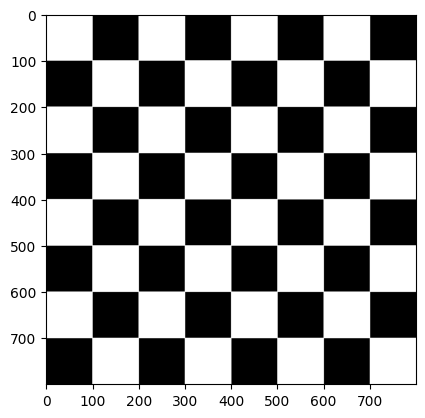

In [11]:
color_img = np.zeros((alto,ancho,3), dtype = np.uint8)

for fila in range(0, alto, 100):
    for columna in range(0, ancho, 100):
        if (fila / 100) % 2 == (columna / 100) % 2:
            cv2.rectangle(color_img, (fila, columna), (fila+100, columna+100), (255,255,255), cv2.FILLED)


plt.imshow(color_img) 
plt.show()

TAREA: Modifica de forma libre los valores de un plano de la imagen

In [4]:
vid = cv2.VideoCapture(0)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        #Separamos canales
        b = frame[:,:,0]
        g = frame[:,:,1]
        r = frame[:,:,2]
        #Dimensiones imagen de entrada
        h, w, c = frame.shape

        b[:,:] = b * 0.25
        g[:,:] = b * 0.75
        r[:,:] = r * 0.5

        #Concateamos en horizontal los tres planos del fotograma
        collage = np.hstack((r, g, b))
    
        # Muestra fotograma redimensionando a la mitad para que quepa en pantalla
        cv2.imshow('RGB', cv2.resize(collage, (int(w*1.5),int(h/2)),cv2.INTER_NEAREST))
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA:
Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 
¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

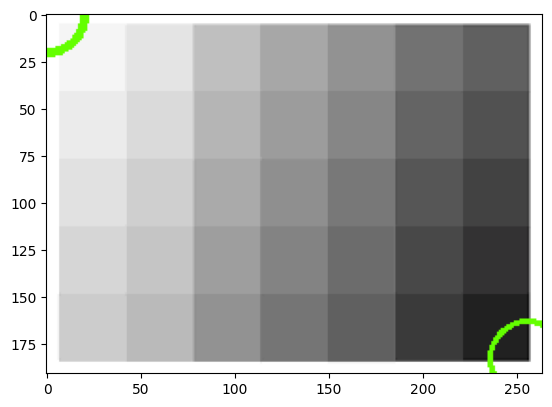

In [20]:
img = cv2.imread('images.png') 

# La imagen se pasa a escala de grises 
img_eg= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Función de cv que obtiene la localización del pixel mínimo y máximo
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(img_eg) 

# Se pinta un círculo en la imagen más oscura
cv2.circle(img, (min_loc[0], min_loc[1]), 20, (0,255,100), 2)

# Se pinta un círculo en la imagen más clara
cv2.circle(img, (max_loc[0], max_loc[1]), 20, (0,255,100), 4)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

TAREA: Llevar a cabo una propuesta propia de pop art.
Es un pop art donde hay dos cuadros el grande (en escala de grises) 
que encierra al pequeño (resalta los colores rojos y azules en un 25%). 

In [55]:
vid = cv2.VideoCapture(0)

w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

w = int(w / 2)
h = int(h / 2)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w) 
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

cuadro_grande = np.zeros((h, w, 3), dtype=np.uint8)

while True:      
    ret, frameIN = vid.read()

    if ret:
        frame = cv2.resize(frameIN, (int(w), int(h)), cv2.INTER_NEAREST)

        # Convertimos a escala de grises
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Separamos canales
        r = frame[:, :, 2]
        g = frame[:, :, 1]
        b = frame[:, :, 0]

        # Total en escala de grises
        cuadro_grande[:, :, 0] = gray_frame
        cuadro_grande[:, :, 1] = gray_frame
        cuadro_grande[:, :, 2] = gray_frame

        rect_h = int(h / 2)
        rect_w = int(w / 2)
        cuadro_pequeño = cuadro_grande[h // 4:(h // 4 + rect_h), w // 4:(w // 4 + rect_w)]

        b[:,:] = b + (b * 0.25)
        r[:,:] = r + (r * 0.25)
        
        b_resized = cv2.resize(b, (rect_w, rect_h))
        g_resized = cv2.resize(g, (rect_w, rect_h))
        r_resized = cv2.resize(r, (rect_w, rect_h))

        cuadro_pequeño[:, :, 0] = b_resized
        cuadro_pequeño[:, :, 1] = g_resized
        cuadro_pequeño[:, :, 2] = r_resized
        
        # Muestra la composición
        cv2.imshow('Cam', cuadro_grande)

    # Detenemos pulsando ESC
    if cv2.waitKey(20) == 27:
        break

# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()
